In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df=pd.read_csv('/home/mohamed/Downloads/listings.csv')

In [3]:
df.shape

(7608, 18)

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


In [5]:
df.columns
# latitude  خط العرض   longitude  خط الطول

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

In [7]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7608
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        710
reviews_per_month                  710
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1134
dtype: int64

In [8]:
# drop the columns that i will not use and nan columns
df.drop(['id','host_id','neighbourhood_group'],axis=1,inplace=True)

In [9]:
df

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,Daniel,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,Alexander,Centrum-Oost,52.364070,4.893930,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,Hendrik,De Pijp - Rivierenbuurt,52.351500,4.896560,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,Maria,Oud-Oost,52.364200,4.928290,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,Flip,Centrum-West,52.387610,4.891880,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Willemijn,De Baarsjes - Oud-West,52.362909,4.866164,Entire home/apt,500,2,0,NaN,NaN,1,17,0,0363 3B54 57D4 8994 D1D2
7604,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Atal,Osdorp,52.354460,4.791710,Entire home/apt,190,2,0,NaN,NaN,1,34,0,0363 8CA7 6BF7 EABB 76E1
7605,Rental unit in Amsterdam · ★New · 2 bedrooms ·...,Sabine,De Baarsjes - Oud-West,52.363597,4.858541,Entire home/apt,359,2,0,NaN,NaN,1,18,0,0363 DE11 2D1E E27B 04D1
7606,Home in Amsterdam · ★New · 2 bedrooms · 2 beds...,Melianthe,Zuid,52.349906,4.860463,Entire home/apt,223,1,0,NaN,NaN,1,73,0,0363 5A64 9849 958A 8FBE


In [10]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,6898.000000,7608.000000,7608.000000,7608.000000
mean,52.366725,4.889936,251.065589,4.914564,47.499211,1.170351,1.798896,79.586619,11.798896
std,0.017068,0.035059,263.170218,33.263777,106.402516,2.353310,2.590756,106.483001,33.469905
min,52.290340,4.755710,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,52.355890,4.866060,148.000000,2.000000,3.000000,0.270000,1.000000,0.000000,0.000000
50%,52.365980,4.887770,202.000000,3.000000,11.000000,0.560000,1.000000,21.000000,3.000000
75%,52.376470,4.908300,300.000000,4.000000,40.000000,1.260000,1.000000,145.000000,9.000000
max,52.425120,5.026430,12000.000000,1001.000000,2720.000000,114.930000,22.000000,365.000000,1626.000000


In [11]:
df['room_type'].value_counts()

Entire home/apt    5783
Private room       1726
Hotel room           56
Shared room          43
Name: room_type, dtype: int64

In [12]:
df.describe(include=["object"])

,name,host_name,neighbourhood,room_type,last_review,license
count,7608,7608,7608,7608,6898,6474
unique,3585,3031,22,4,977,5737
top,Rental unit in Amsterdam · ★5.0 · 1 bedroom · ...,Maarten,De Baarsjes - Oud-West,Entire home/apt,2023-05-21,Exempt
freq,224,39,1260,5783,345,571


<Axes: xlabel='room_type', ylabel='count'>

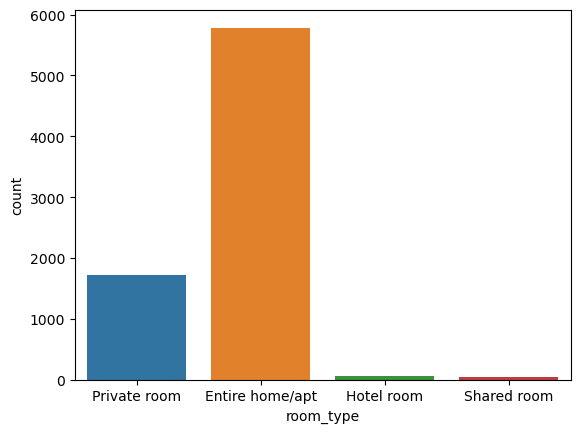

In [13]:
sns.countplot(x='room_type',data=df)

<Axes: xlabel='room_type', ylabel='number_of_reviews'>

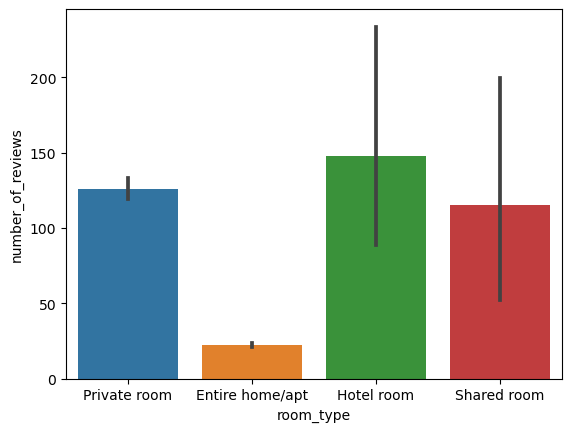

In [14]:
# to visualize the number of reviews for each room type 
sns.barplot(data=df, x="room_type", y="number_of_reviews")

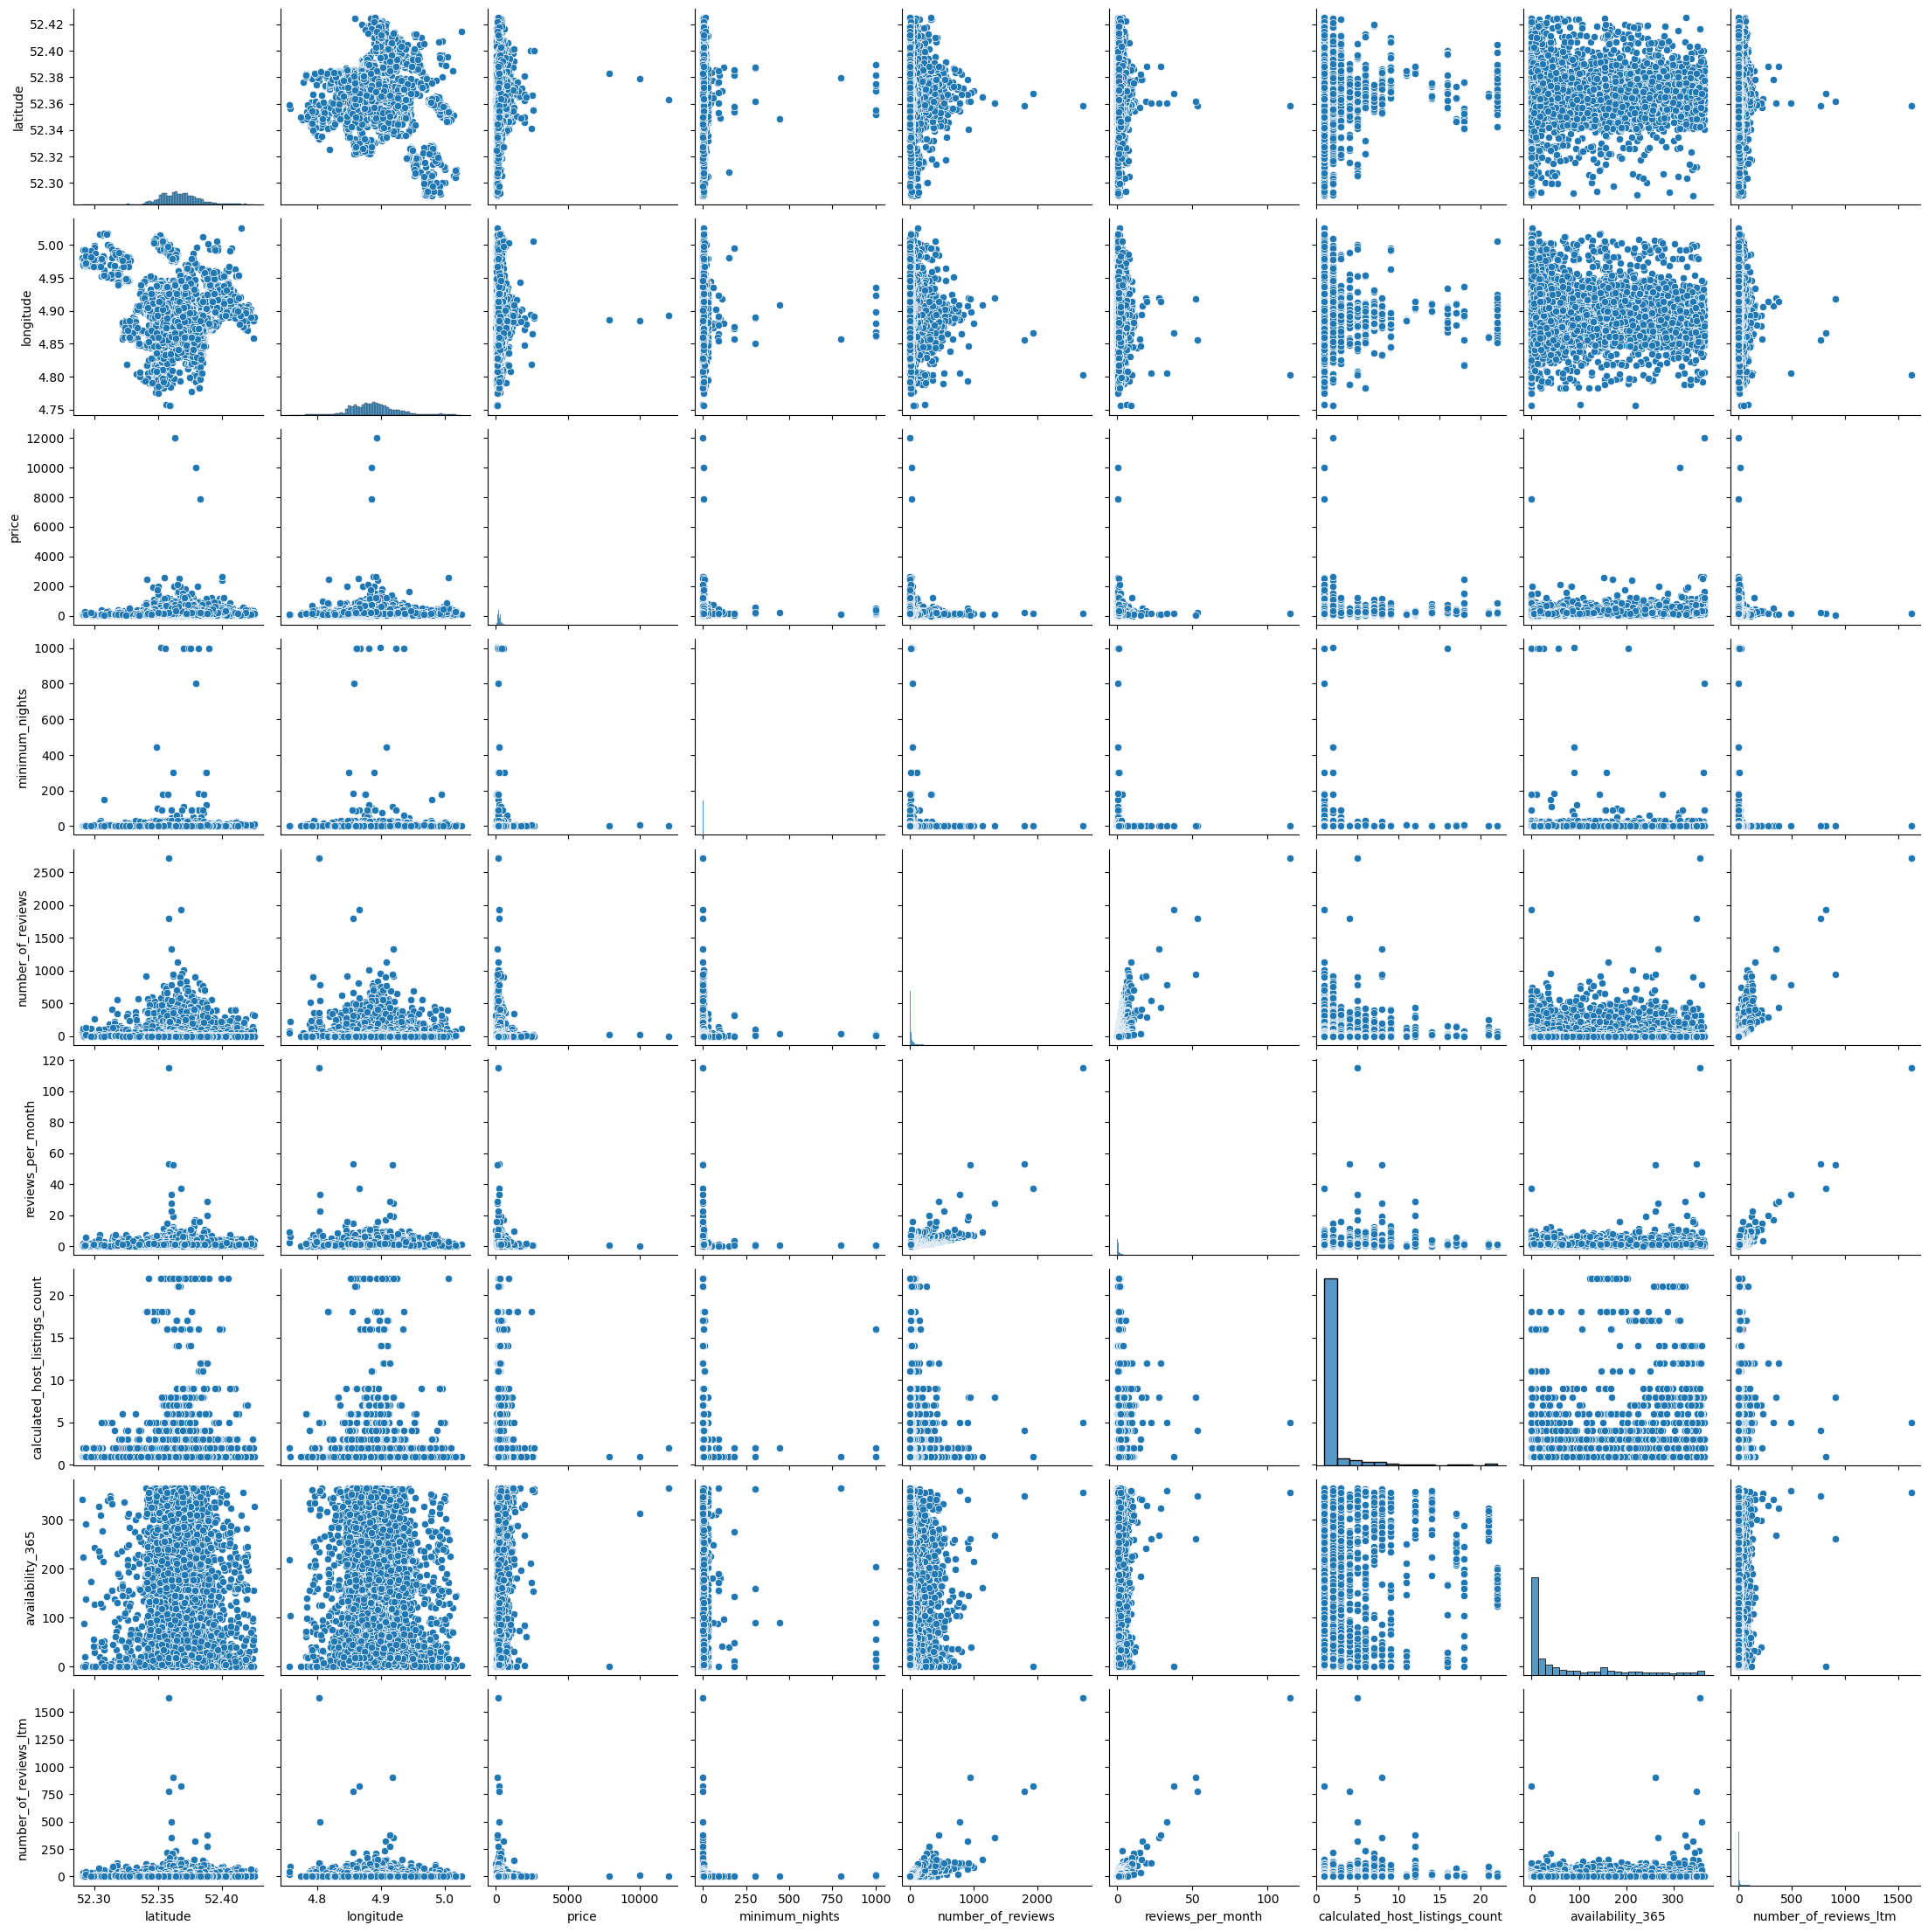

In [15]:
sns.pairplot(df)

In [16]:
# get average price 
df['price'].mean()

251.06558885383808

<Axes: xlabel='number_of_reviews', ylabel='price'>

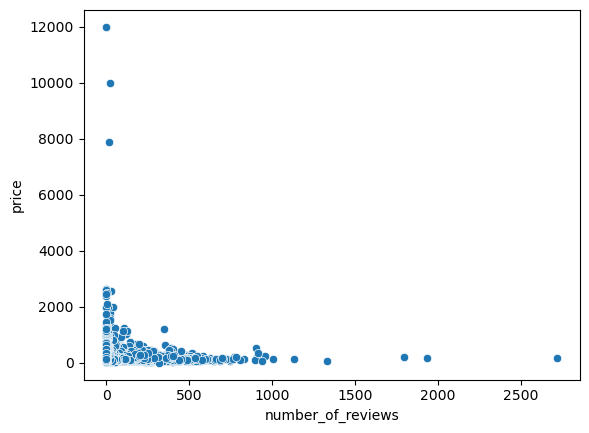

In [17]:
# Explore the relationship between the number of reviews and listing prices.
sns.scatterplot(data=df,x='number_of_reviews',y='price')

<Axes: xlabel='latitude', ylabel='longitude'>

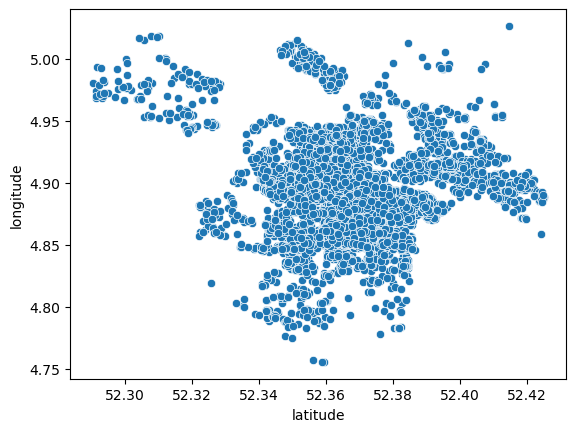

In [18]:
sns.scatterplot(data=df,x='latitude',y='longitude')

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>]], dtype=object)

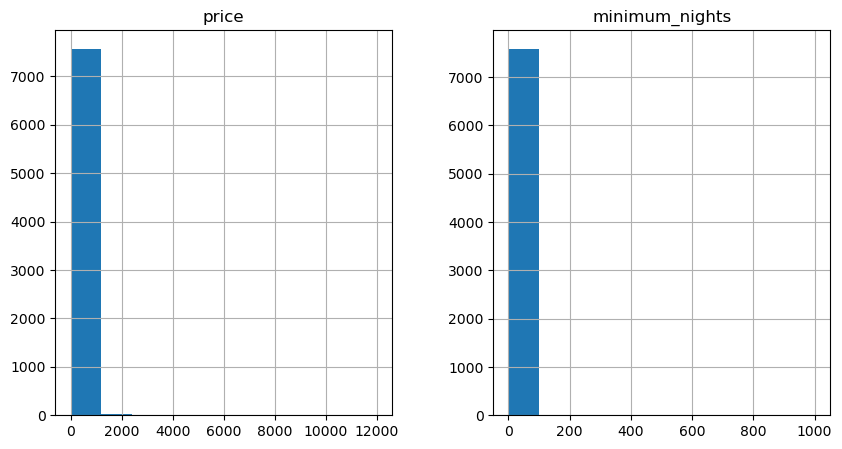

In [19]:
# Visualize the distribution of listing prices and to see how many listings have different minimum stay requirements.
features=["price","minimum_nights"]
df[features].hist(figsize=(10,5))

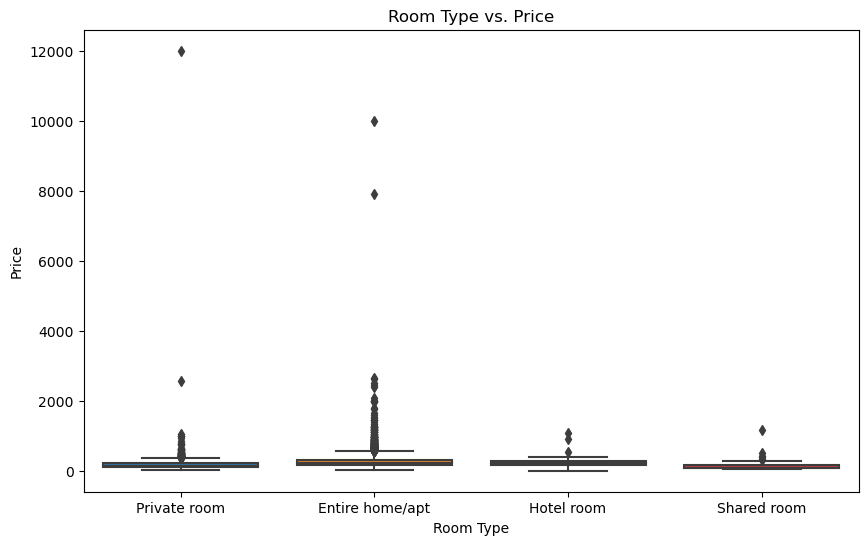

In [20]:
# compare the distribution of prices for different room types
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Room Type vs. Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

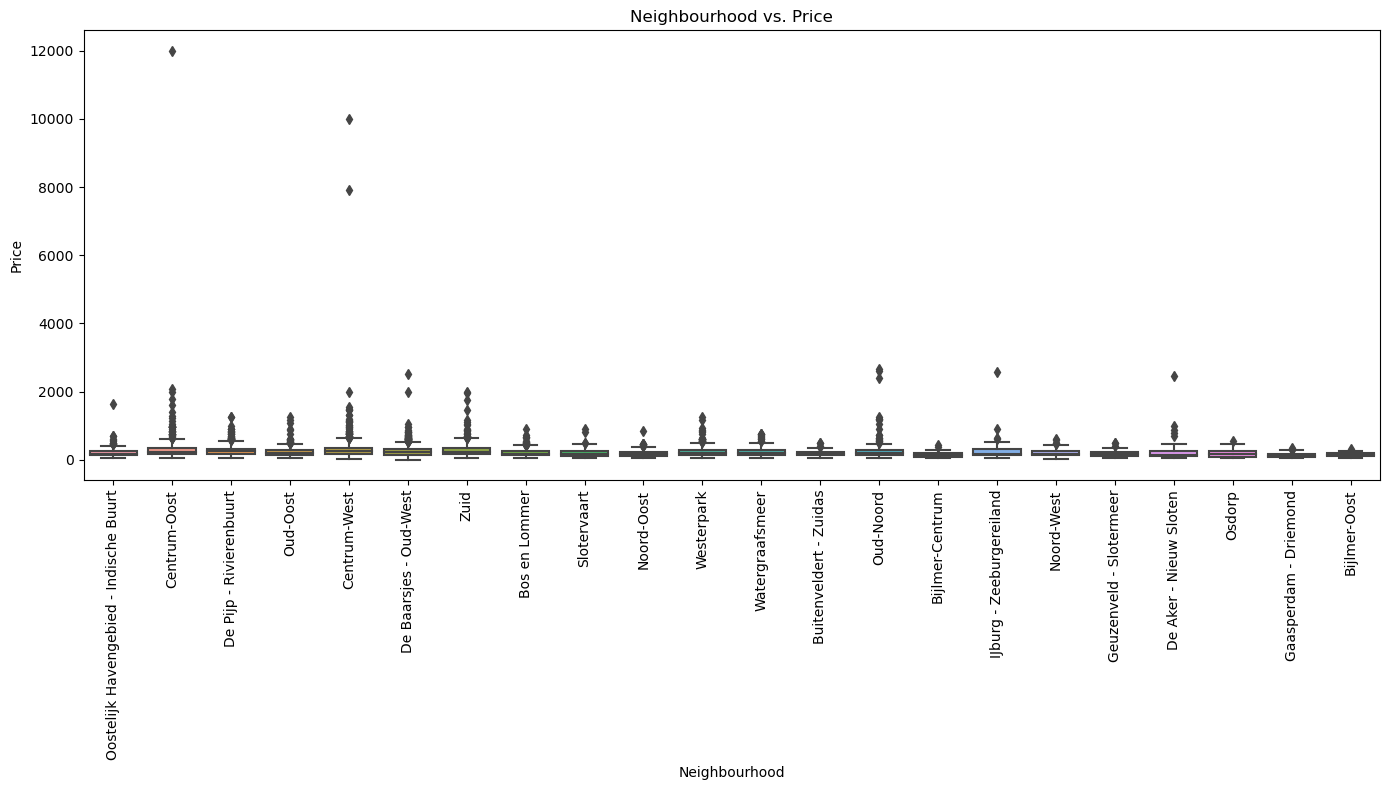

In [21]:
# show price variations across different neighborhoods.
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='price', data=df)
plt.title('Neighbourhood vs. Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()